## Classification_models

In [407]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold

from sklearn.svm import LinearSVC, SVC

DATA READING

In [408]:
data=pd.read_csv("/content/data.csv")


In [409]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [410]:
data.shape

(569, 33)

DATA CLEANING/PREPROCESSING/EDA

In [411]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [412]:
data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [413]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [414]:
data["diagnosis"].describe()

count     569
unique      2
top         B
freq      357
Name: diagnosis, dtype: object

In [415]:
data.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [416]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [417]:
data.drop(columns=["id"],axis=1,inplace=True)

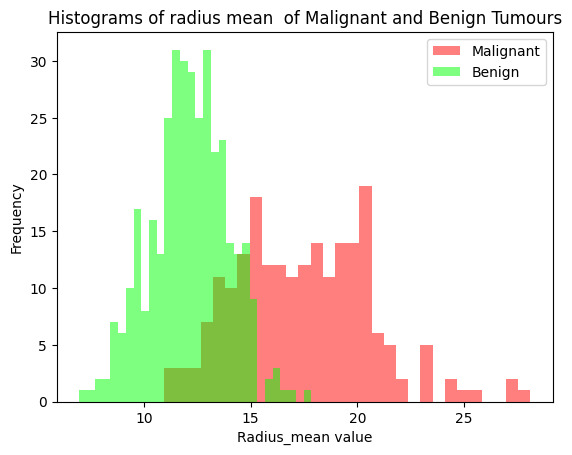

Most frequent malignant radius mean is : 20.101999999999997


In [418]:
m=plt.hist(data[data["diagnosis"]=="M"].radius_mean,bins=30,fc=(1,0,0,0.5),label="Malignant")
b=plt.hist(data[data["diagnosis"]=="B"].radius_mean,bins=30,fc=(0,1,0,0.5),label="Benign")
plt.xlabel("Radius_mean value")
plt.ylabel("Frequency")
plt.title("Histograms of radius mean  of Malignant and Benign Tumours")
plt.legend()
plt.show()
frequent_malignant_radius_mean=m[0].max()
index_frequent_malignant_radius_mean=list(m[0]).index(frequent_malignant_radius_mean)
most_frequent_malignant_radius_mean=m[1][index_frequent_malignant_radius_mean]
print("Most frequent malignant radius mean is :",most_frequent_malignant_radius_mean)

<ipython-input-419-79f2d8a43c9d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<Figure size 2000x2000 with 0 Axes>

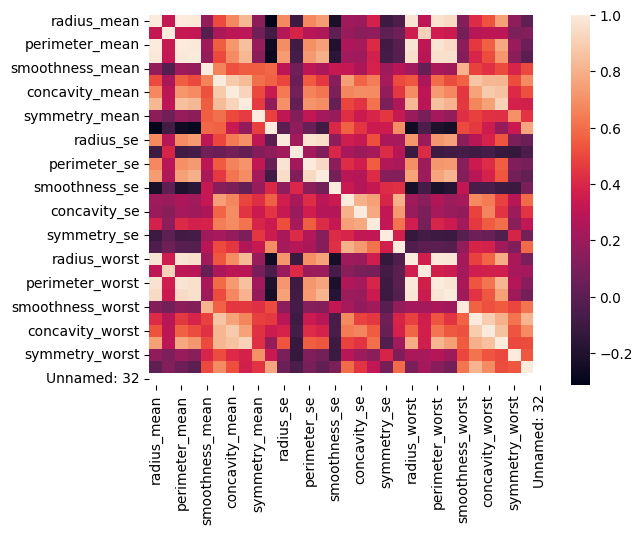

<Figure size 2000x2000 with 0 Axes>

In [419]:
sns.heatmap(data.corr())
plt.figure(figsize=(20,20))

<Axes: ylabel='count'>

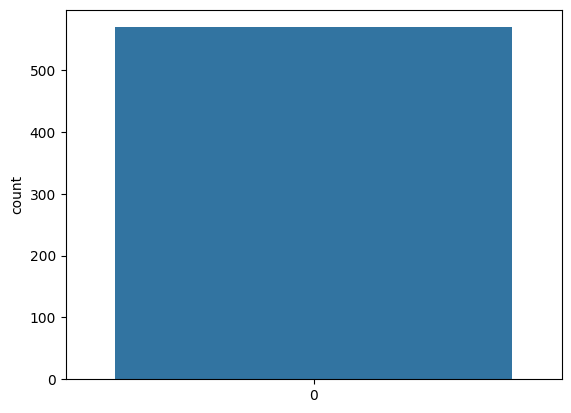

In [420]:
sns.countplot(data["radius_mean"])

In [421]:
#sns.countplot(data["diagnosis"])

<ipython-input-422-7f129716137e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["compactness_worst"])


<Axes: xlabel='compactness_worst', ylabel='Density'>

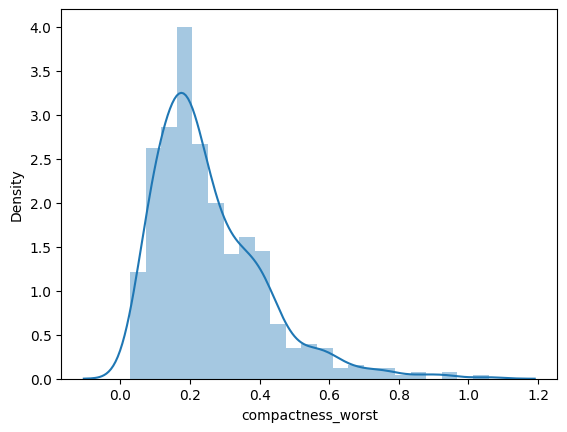

In [422]:
sns.distplot(data["compactness_worst"])

<Axes: ylabel='diagnosis'>

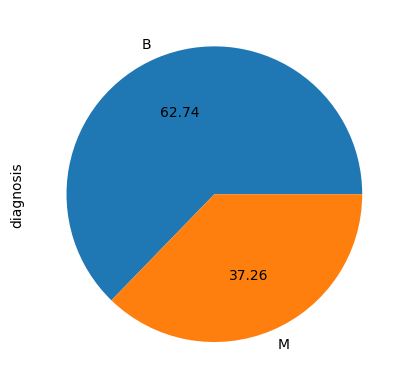

In [423]:
data["diagnosis"].value_counts().plot(kind="pie",autopct="%0.2f")

<ipython-input-424-4e641e283371>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["smoothness_mean"])


<Axes: xlabel='smoothness_mean', ylabel='Density'>

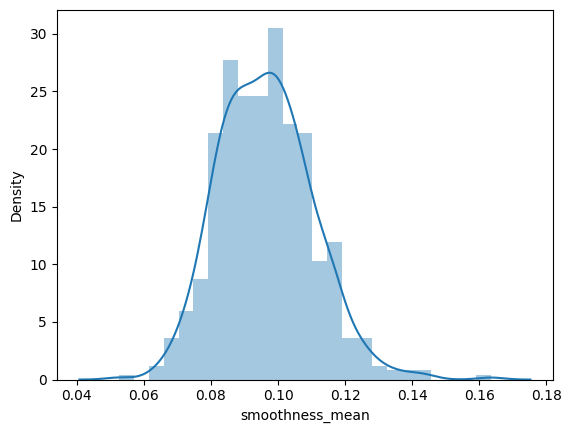

In [424]:
sns.distplot(data["smoothness_mean"])

In [425]:
y=data["diagnosis"]

TRAIN TEST SPLIT

In [426]:
X=data.drop(["diagnosis"],axis=1)
y=data["diagnosis"]#Target variable

In [427]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [428]:
X.shape

(569, 31)

In [429]:
y.isnull().sum()

0

In [430]:
y.tail()

564    M
565    M
566    M
567    M
568    B
Name: diagnosis, dtype: object

In [431]:
y=data["diagnosis"].value_counts().isnull().sum()
y

0

In [432]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [433]:
data["diagnosis"].unique()

array(['M', 'B'], dtype=object)

In [434]:
data['diagnosis'].replace(["M","B"],[1, 0],inplace=True)
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [435]:
data.isnull().sum()

diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: i

In [436]:
data.drop(columns=['Unnamed: 32'],inplace=True)

In [437]:
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Determine the features and target variable

In [438]:
X=data.drop(["diagnosis"],axis=1)
y=data["diagnosis"]#Target variable

In [439]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [440]:
X_train.shape,X_test.shape

((398, 30), (171, 30))

In [441]:
#our predictors
y_pred=["radius_mean","texture_mean","perimeter_mean","smoothness_mean","compactness_mean","symmetry_mean"]

In [442]:
y_train

149    0
124    0
421    0
195    0
545    0
      ..
71     0
106    0
270    0
435    1
102    0
Name: diagnosis, Length: 398, dtype: int64

In [443]:
y_test

204    0
70     1
131    1
431    0
540    0
      ..
69     0
542    0
176    0
501    1
247    0
Name: diagnosis, Length: 171, dtype: int64

### MODELING=LR,SVM,Navie_bayes

Feature scaling with StandardScaler

In [444]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [445]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(X_train)
scaled_X_train=ss.transform(X_train)
scaled_X_test=ss.transform(X_test)

#Logistic regression

> Indented block



In [446]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42,penalty="l2")

In [447]:
model.fit(scaled_X_train,y_train)

LogisticRegression(random_state=42)

In [448]:
y_predsc=model.predict(scaled_X_test)
accuracy_score(y_test,y_predsc)

0.9824561403508771

In [449]:
#Evaluate the model -Logistic regression

In [450]:
model.score(scaled_X_train,y_train)


0.9874371859296482

In [451]:
model.score(scaled_X_test,y_test)

0.9824561403508771

Confusion Matrix,classification_report,accuracy_score

In [452]:
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report

In [453]:
print(classification_report(y_test,y_predsc))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       108
           1       0.97      0.98      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



In [454]:
cm = confusion_matrix(y_test,y_predsc)

In [455]:
tn, fp, fn , tp = confusion_matrix(y_test,y_predsc).ravel()

In [456]:
tn,fp,fn,tp
print(tn,fp,fn,tp)

106 2 1 62


In [457]:
cm

array([[106,   2],
       [  1,  62]])

Confusion DataFrame

In [458]:
cm_df = pd.DataFrame(cm, columns = ['Pred Positive','Pred Negative'], index = ['Actual P', 'Actual N'])

In [459]:
cm_df.head()

,Pred Positive,Pred Negative
Actual P,106,2
Actual N,1,62


In [460]:
(106+62)/(106+1+2+62)

0.9824561403508771

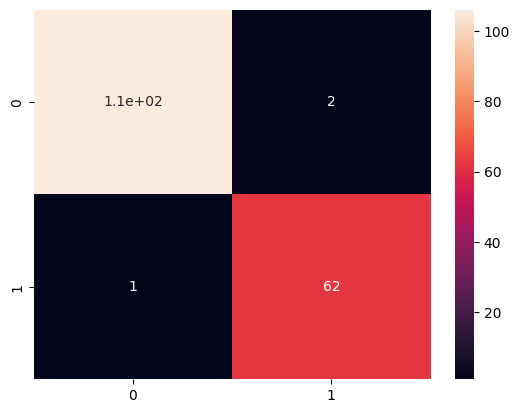

In [461]:
sns.heatmap(cm,annot=True)
plt.savefig("h.png")

#gridsearch

In [462]:
from sklearn.model_selection import GridSearchCV

In [463]:
gridlr= GridSearchCV(model,{
    'penalty': ['l1','l2'],
    'C': [1, 10, 100]
})
gridlr.fit(scaled_X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(estimator=LogisticRegression(random_state=42),
             param_grid={'C': [1, 10, 100], 'penalty': ['l1', 'l2']})

In [464]:
gridlr.score(scaled_X_train,y_train)

0.9874371859296482

In [465]:
gridlr.score(scaled_X_test,y_test)

0.9824561403508771

# support vector machine-classification algorithm

In [466]:
from sklearn.svm import LinearSVC
clf=LinearSVC()
clf.fit(scaled_X_train,y_train)
y_pred_svc=model.predict(scaled_X_test)
accuracy_score(y_test,y_pred_svc)


0.9824561403508771

#Evaluate the model-SVC(libLinear)

In [467]:
clf.score(scaled_X_train,y_train)

0.9874371859296482

In [468]:
clf.score(scaled_X_test,y_test)

0.9766081871345029

Confusion Matrix

In [469]:
cm = confusion_matrix(y_test,y_pred_svc)

In [470]:
tn, fp, fn , tp = confusion_matrix(y_test,y_pred_svc).ravel()

In [471]:
tn,fp,fn,tp
print(tn,fp,fn,tp)

106 2 1 62


In [472]:
cm

array([[106,   2],
       [  1,  62]])

confusion dataframe

In [473]:
cm_df = pd.DataFrame(cm, columns = ['Pred Positive','Pred Negative'], index = ['Actual P', 'Actual N'])

In [474]:
cm_df.head()

,Pred Positive,Pred Negative
Actual P,106,2
Actual N,1,62


In [475]:
(106+62)/(106+1+2+62)

0.9824561403508771

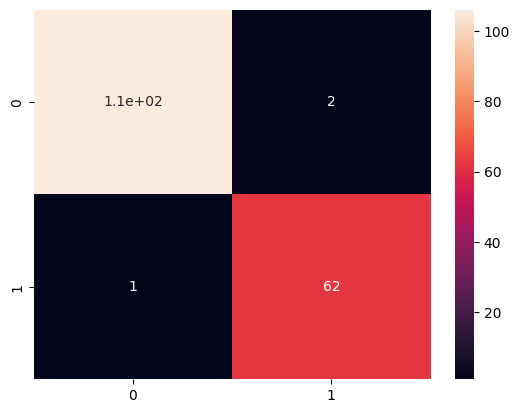

In [476]:
sns.heatmap(cm,annot=True)
plt.savefig("h.png")

accuracy_score,confusion matrix,classification_report of linearSVC

In [477]:
from sklearn.metrics import precision_recall_curve

In [478]:
#!apt-get install

In [479]:
#!pip install matplotlib-venn

In [480]:
#!apt-get -qq install -y graphviz && pip install pydot
import pydot

In [481]:
#!pip install cartopy
#import cartopy

In [482]:
recall_score(y_test,y_pred_svc)

0.9841269841269841

In [483]:
precision_score(y_test,y_pred_svc)

0.96875

In [484]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(classification_report(y_test,y_pred_svc))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       108
           1       0.97      0.98      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



#navie bayes  classifier algorithm

In [485]:
from sklearn.naive_bayes import GaussianNB
gunb=GaussianNB()
modelg=gunb.fit(X_train,y_train)
y_pred_gnb=gunb.predict(X_test)
accuracy_score(y_test,y_pred_gnb)


0.9415204678362573

Evaluate the model

In [486]:
modelg.score(X_train,y_train)

0.9396984924623115

In [487]:
modelg.score(X_test,y_test)

0.9415204678362573

naive_bayes on scaled data

In [488]:
from sklearn.naive_bayes import GaussianNB
gunb=GaussianNB()
modelg=gunb.fit(scaled_X_train,y_train)
y_pred_gnb_sc=gunb.predict(scaled_X_test)
accuracy_score(y_test,y_pred_gnb_sc)

0.935672514619883

Evaluate the data

In [489]:
modelg.score(scaled_X_train,y_train)

0.9422110552763819

In [490]:
modelg.score(scaled_X_test,y_test)

0.935672514619883

confusion matrix

In [491]:
cm = confusion_matrix(y_test,y_pred_gnb)

In [492]:
tn, fp, fn , tp = confusion_matrix(y_test,y_pred_gnb).ravel()

In [493]:
tn,fp,fn,tp
print(tn,fp,fn,tp)

104 4 6 57


In [494]:
cm

array([[104,   4],
       [  6,  57]])

In [495]:
cm_df = pd.DataFrame(cm, columns = ['Pred Positive','Pred Negative'], index = ['Actual P', 'Actual N'])

In [496]:
cm_df.head()

,Pred Positive,Pred Negative
Actual P,104,4
Actual N,6,57


In [497]:
(104+57)/(104+6+4+57)

0.9415204678362573

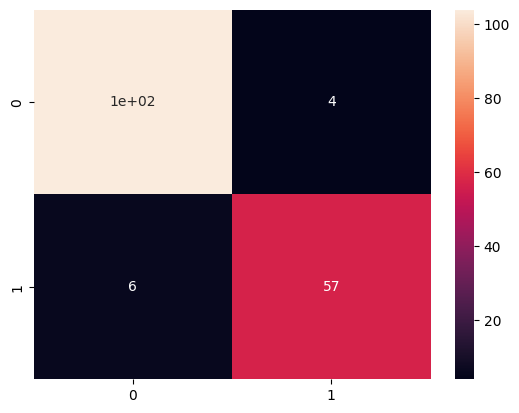

In [498]:
sns.heatmap(cm,annot=True)
plt.savefig("h.png")

In [499]:
recall_score(y_test,y_pred_gnb)

0.9047619047619048

In [500]:
precision_score(y_test,y_pred_gnb)

0.9344262295081968

In [501]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(classification_report(y_test,y_pred_gnb))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       108
           1       0.93      0.90      0.92        63

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171

